In [ ]:
import pandas as pd

# Paths to the datasets
non_substance_path = ""
substance_path = ""

# Load the datasets
non_substance_df = pd.read_csv(non_substance_path)
substance_df = pd.read_csv(substance_path)

# Add label columns
non_substance_df['SubstanceUse'] = 0  # Label 0 for non-substance use
substance_df['SubstanceUse'] = 1      # Label 1 for substance use

# Combine the two datasets
combined_df = pd.concat([non_substance_df, substance_df], ignore_index=True)




In [7]:
# Drop any columns with 'Unnamed' in their name in the combined dataframe
combined_df = combined_df.loc[:, ~combined_df.columns.str.contains('^Unnamed')]

In [8]:
combined_df.shape

(4516, 8)

In [12]:
import nltk, string

from nltk import word_tokenize

from nltk.corpus import stopwords

def clean(text = '', stopwords = []):

    #tokenize

    tokens = word_tokenize(text.strip())

    #lowercase

    clean = [i.lower() for i in tokens]

    #remove stopwords

    clean = [i for i in clean if i not in stopwords]

    #remove ponctuation

    punctuations = list(string.punctuation)

    clean = [i.strip(''.join(punctuations)) for i in clean if i not in

    punctuations]

    return " ".join(clean)

In [13]:
combined_df['posts'] = combined_df['posts'].apply(str) #make sure description is a string

combined_df['posts'] = combined_df['posts'].apply(lambda x: clean(text = x, stopwords = stopwords.words('english')))

In [14]:
combined_df.head(3)

,author,created_utc,selftext,title,subreddit,date,posts,SubstanceUse
0,Hajimemeforme,2018-08-18 09:41:01,there is a day to celebrate love in our countr...,TIFU,teenagers,2018-08-18 09:41:01,tifu day celebrate love country 7/7 lunar cale...,0
1,Slayyr_,2018-12-11 04:15:04,"\n\n\n\nliterally say anything to anyone, 80% ...",How to make friends in high school,teenagers,2018-12-11 04:15:04,make friends high school literally say anythin...,0
2,ScndChoice,2018-10-06 19:38:11,i accidentally trew away all my notes for a ph...,Am I retarded or just really dumb,teenagers,2018-10-06 19:38:11,retarded really dumb accidentally trew away no...,0


In [16]:
combined_df.shape


(4516, 8)

In [17]:
import pandas as pd

# Assuming your DataFrame is named df
# Remove rows where 'posts' column is NaN
df = combined_df.dropna(subset=['posts'])

# Display the cleaned DataFrame
print(df.shape)


(4516, 8)


In [15]:
combined_df.to_csv('2018SubNonsub.csv')

In [ ]:
import pandas as pd
import os

# Define folder paths
non_substance_folder = ''
substance_folder = ''

# Initialize an empty list to store DataFrames
dataframes = []

# Function to read CSV files from a folder and print each file's shape
def read_and_print_shapes(folder_path):
    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):
            file_path = os.path.join(folder_path, filename)
            df = pd.read_csv(file_path)
            dataframes.append(df)
            print(f"File: {filename}, Shape: {df.shape}")

# Process both folders
read_and_print_shapes(non_substance_folder)
read_and_print_shapes(substance_folder)

# Combine all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Display the shape of the combined DataFrame
print("Combined DataFrame Shape:", combined_df.shape)


File: 2018_None_SubStance_2258_filtered.csv, Shape: (2258, 9)
File: 2019_None_SubStance_7384.csv, Shape: (7384, 9)
File: 2022_None_SubStance_3672.csv, Shape: (3672, 9)
File: 2021_None_SubStance_4249.csv, Shape: (4249, 9)
File: 2020_None_SubStance_5712.csv, Shape: (5712, 9)
File: 2021_SubStance_4249.csv, Shape: (4249, 9)
File: 2019_SubStance_7384.csv, Shape: (7384, 9)
File: 2020_SubStance_5712.csv, Shape: (5712, 9)
File: 2018_SubStance_2258.csv, Shape: (2258, 9)
File: 2022_SubStance_3672.csv, Shape: (3672, 9)
Combined DataFrame Shape: (46550, 9)


In [26]:
# Function to read CSV files from a folder, add 'substance' label, and print each file's shape
def read_and_print_shapes(folder_path, label):
    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):
            file_path = os.path.join(folder_path, filename)
            df = pd.read_csv(file_path)
            df['substance'] = label  # Add substance label
            dataframes.append(df)
            print(f"File: {filename}, Shape: {df.shape}")

# Process both folders with appropriate labels
read_and_print_shapes(non_substance_folder, label=0)  # Label 0 for non-substance folder
read_and_print_shapes(substance_folder, label=1)      # Label 1 for substance folder

# Combine all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Display the shape of the combined DataFrame
print("Combined DataFrame Shape:", combined_df.shape)

File: 2018_None_SubStance_2258_filtered.csv, Shape: (2258, 10)
File: 2019_None_SubStance_7384.csv, Shape: (7384, 10)
File: 2022_None_SubStance_3672.csv, Shape: (3672, 10)
File: 2021_None_SubStance_4249.csv, Shape: (4249, 10)
File: 2020_None_SubStance_5712.csv, Shape: (5712, 10)
File: 2021_SubStance_4249.csv, Shape: (4249, 10)
File: 2019_SubStance_7384.csv, Shape: (7384, 10)
File: 2020_SubStance_5712.csv, Shape: (5712, 10)
File: 2018_SubStance_2258.csv, Shape: (2258, 10)
File: 2022_SubStance_3672.csv, Shape: (3672, 10)
Combined DataFrame Shape: (93100, 10)


In [ ]:
import pandas as pd
import os

# Define folder paths
non_substance_folder = ''
substance_folder = ''

# Initialize an empty list to store DataFrames
dataframes = []

# Function to read CSV files from a folder, add 'substance' label, and print each file's shape
def read_and_print_shapes(folder_path, label):
    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):
            file_path = os.path.join(folder_path, filename)
            df = pd.read_csv(file_path)
            df['substance'] = label  # Add the 'substance' label before any other operation
            dataframes.append(df)
            print(f"File: {filename}, Shape: {df.shape}")

# Process both folders with appropriate labels
read_and_print_shapes(non_substance_folder, label=0)  # Label 0 for non-substance folder
read_and_print_shapes(substance_folder, label=1)      # Label 1 for substance folder

# Combine all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Check for any remaining NaN values in the 'substance' column
if combined_df['substance'].isna().any():
    print("Warning: There are still NaN values in the 'substance' column.")
else:
    print("All entries in 'substance' column are labeled correctly.")

# Display the shape of the combined DataFrame
print("Combined DataFrame Shape:", combined_df.shape)

# Display the first few rows of the combined DataFrame
print(combined_df.head())


File: 2018_None_SubStance_2258_filtered.csv, Shape: (2258, 10)
File: 2019_None_SubStance_7384.csv, Shape: (7384, 10)
File: 2022_None_SubStance_3672.csv, Shape: (3672, 10)
File: 2021_None_SubStance_4249.csv, Shape: (4249, 10)
File: 2020_None_SubStance_5712.csv, Shape: (5712, 10)
File: 2021_SubStance_4249.csv, Shape: (4249, 10)
File: 2019_SubStance_7384.csv, Shape: (7384, 10)
File: 2020_SubStance_5712.csv, Shape: (5712, 10)
File: 2018_SubStance_2258.csv, Shape: (2258, 10)
File: 2022_SubStance_3672.csv, Shape: (3672, 10)
All entries in 'substance' column are labeled correctly.
Combined DataFrame Shape: (46550, 10)
   Unnamed: 0.1  Unnamed: 0           author          created_utc  \
0         97258      300155    Hajimemeforme  2018-08-18 09:41:01   
1         79310      244446          Slayyr_  2018-12-11 04:15:04   
2         46661      147104       ScndChoice  2018-10-06 19:38:11   
3         12048       55492  Nomorebeatingit  2018-03-04 22:36:16   
4        107526      328838    chees

In [29]:
# Count the occurrences of 0 and 1 in the 'substance' column
substance_counts = combined_df['substance'].value_counts()
print("Counts of each label in the 'substance' column:")
print(substance_counts)


Counts of each label in the 'substance' column:
substance
0    23275
1    23275
Name: count, dtype: int64


In [33]:
combined_df.head(3)

,author,created_utc,selftext,title,subreddit,date,posts,substance
0,Hajimemeforme,2018-08-18 09:41:01,there is a day to celebrate love in our countr...,TIFU,teenagers,2018-08-18 09:41:01,tifu day celebrate love country 7/7 lunar cale...,0
1,Slayyr_,2018-12-11 04:15:04,"\n\n\n\nliterally say anything to anyone, 80% ...",How to make friends in high school,teenagers,2018-12-11 04:15:04,make friends high school literally say anythin...,0
2,ScndChoice,2018-10-06 19:38:11,i accidentally trew away all my notes for a ph...,Am I retarded or just really dumb,teenagers,2018-10-06 19:38:11,retarded really dumb accidentally trew away no...,0


In [31]:
combined_df['posts'] = combined_df['posts'].apply(str) #make sure description is a string

combined_df['posts'] = combined_df['posts'].apply(lambda x: clean(text = x, stopwords = stopwords.words('english')))

In [32]:
combined_df.shape

(46550, 8)

In [22]:
import pandas as pd

# Assuming your DataFrame is named df
# Remove rows where 'posts' column is NaN
df = combined_df.dropna(subset=['posts'])

# Display the cleaned DataFrame
print(df.shape)

(46550, 9)


In [30]:
# Drop the unwanted columns 'Unnamed: 0' and 'Unnamed: 0.1' if they exist in the DataFrame
combined_df = combined_df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], errors='ignore')

# Display the first few rows to verify the columns are dropped
print(combined_df.head())


            author          created_utc  \
0    Hajimemeforme  2018-08-18 09:41:01   
1          Slayyr_  2018-12-11 04:15:04   
2       ScndChoice  2018-10-06 19:38:11   
3  Nomorebeatingit  2018-03-04 22:36:16   
4    cheeseman3715  2018-01-08 15:20:24   

                                            selftext  \
0  there is a day to celebrate love in our countr...   
1  \n\n\n\nliterally say anything to anyone, 80% ...   
2  i accidentally trew away all my notes for a ph...   
3  in the summer the sun is hot\nin fall and spri...   
4                                   t'is pretty good   

                                               title  subreddit  \
0                                               TIFU  teenagers   
1                 How to make friends in high school  teenagers   
2                  Am I retarded or just really dumb  teenagers   
3  guys and gals i figured out why the seasons ha...  teenagers   
4  Has anyone else listened to the new Red Vox al...  teenagers   

 

In [46]:
import pandas as pd

# Assuming 'combined_df' is the DataFrame obtained after merging the CSV files

# Step 1: Remove duplicates based on all columns
combined_df = combined_df.drop_duplicates()

# Step 2: Remove rows with 'posts' that have fewer than 5 tokens
# First, ensure the 'posts' column exists and is cleaned
if 'posts' in combined_df.columns:
    # Tokenize each 'posts' entry and filter rows with fewer than 5 tokens
    combined_df = combined_df[combined_df['posts'].str.split().str.len() >= 10]

# Display the cleaned DataFrame and its shape
print(combined_df.head())
print("Cleaned DataFrame Shape:", combined_df.shape)


   Unnamed: 0.1  Unnamed: 0           author          created_utc  \
0         97258      300155    Hajimemeforme  2018-08-18 09:41:01   
1         79310      244446          Slayyr_  2018-12-11 04:15:04   
2         46661      147104       ScndChoice  2018-10-06 19:38:11   
3         12048       55492  Nomorebeatingit  2018-03-04 22:36:16   
4        107526      328838    cheeseman3715  2018-01-08 15:20:24   

                                            selftext  \
0  there is a day to celebrate love in our countr...   
1  \n\n\n\nliterally say anything to anyone, 80% ...   
2  i accidentally trew away all my notes for a ph...   
3  in the summer the sun is hot\nin fall and spri...   
4                                   t'is pretty good   

                                               title  subreddit  \
0                                               TIFU  teenagers   
1                 How to make friends in high school  teenagers   
2                  Am I retarded or just really

In [ ]:
combined_df.to_csv('',index=False)

In [ ]:
import pandas as pd
combined_df=pd.read_csv('')

In [3]:
combined_df.head(3)

,author,created_utc,selftext,title,subreddit,date,posts,substance
0,Hajimemeforme,2018-08-18 09:41:01,there is a day to celebrate love in our countr...,TIFU,teenagers,2018-08-18 09:41:01,tifu day celebrate love country 7/7 lunar cale...,0
1,Slayyr_,2018-12-11 04:15:04,"\n\n\n\nliterally say anything to anyone, 80% ...",How to make friends in high school,teenagers,2018-12-11 04:15:04,make friends high school literally say anythin...,0
2,ScndChoice,2018-10-06 19:38:11,i accidentally trew away all my notes for a ph...,Am I retarded or just really dumb,teenagers,2018-10-06 19:38:11,retarded really dumb accidentally trew away no...,0


In [5]:
# Ensure 'created_utc' is in datetime format
combined_df['created_utc'] = pd.to_datetime(combined_df['created_utc'], errors='coerce')

# Filter for posts where 'substance' is 1
df_substance = combined_df[combined_df['substance'] == 1]

# Remove any rows with NaT (if any date conversions failed)
df_substance = df_substance.dropna(subset=['created_utc'])

# Extract month and year for aggregation
df_substance['month_year'] = df_substance['created_utc'].dt.to_period('M')

# Count posts per month-year for substance-related posts
monthly_counts_substance = df_substance.groupby('month_year').size()

# Convert counts to percentages of the total substance-related posts
monthly_percentage_substance = (monthly_counts_substance / monthly_counts_substance.sum()) * 100


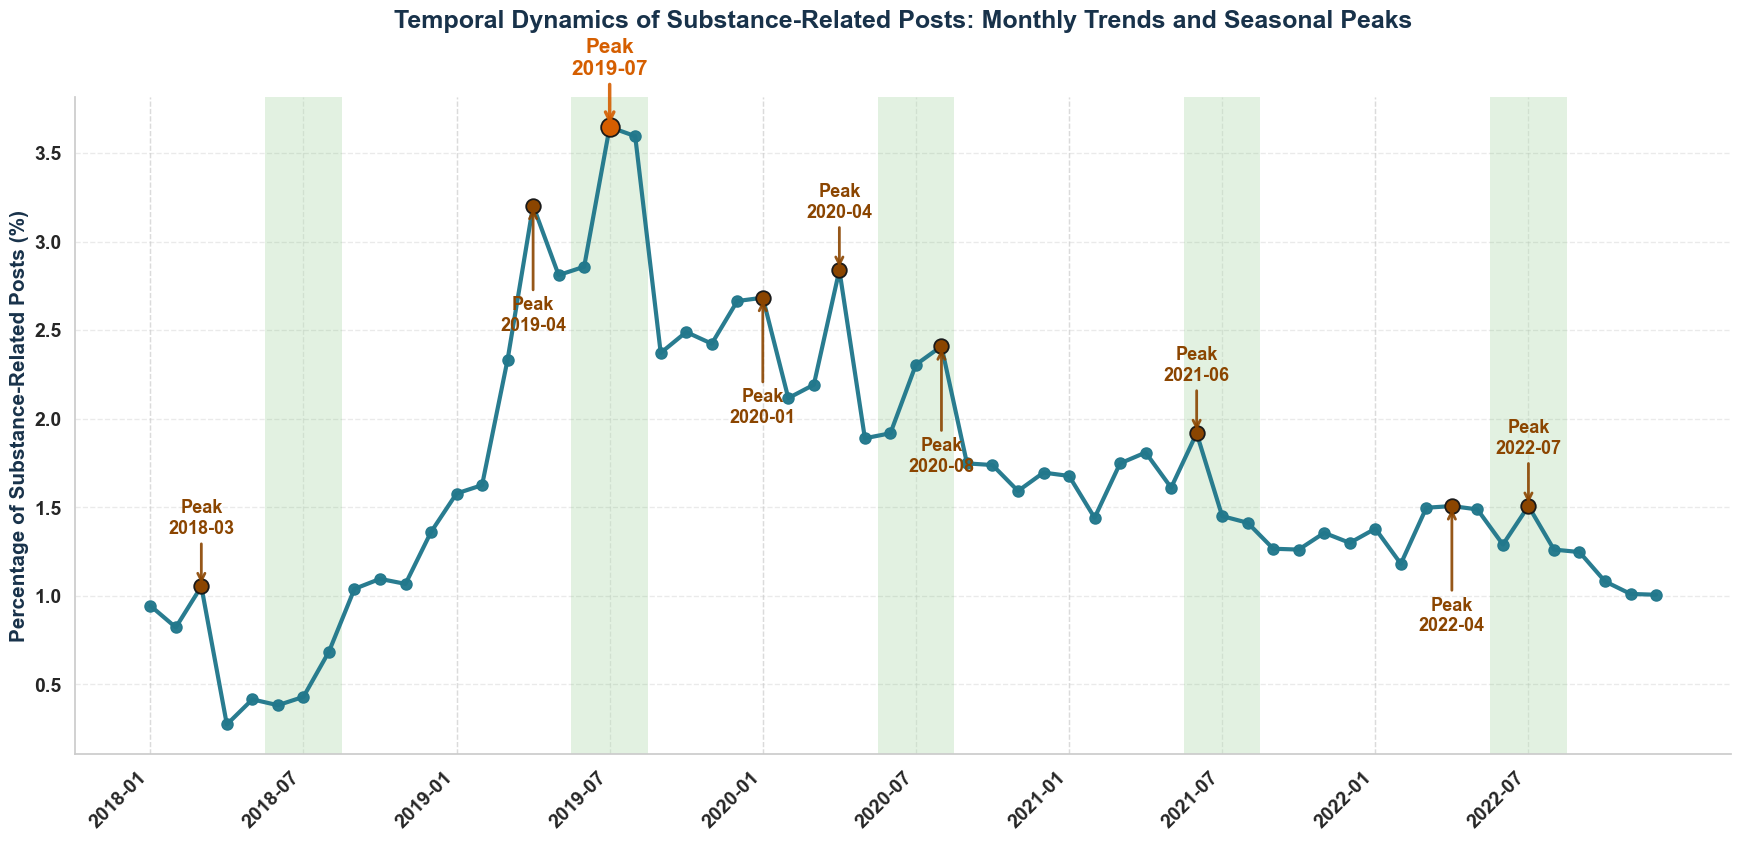

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.signal import find_peaks

idx = monthly_percentage_substance.index.astype(str)
values = monthly_percentage_substance.values

plt.figure(figsize=(18, 9))
sns.set_theme(style="whitegrid", font_scale=1.18)

# 更深色的主线/点/峰值
main_line_color = "#22788C"     # 深蓝青
main_peak_color = "#D55E00"     # 深橙
minor_peak_color = "#8B4500"    # 深棕
summer_color = "#60B45D"        # 深草绿

# 主线加粗
plt.plot(idx, values, marker="o", color=main_line_color, linewidth=3, alpha=0.97, zorder=2, markersize=8)

# 检测所有 peak
peaks, _ = find_peaks(values, prominence=0.2)
max_peak = np.argmax(values)

for n, p in enumerate(peaks):
    color = main_peak_color if p == max_peak else minor_peak_color
    size = 180 if p == max_peak else 110
    # 奇偶交错
    if n % 2 == 0:
        xytext = (0, 35)
        va = 'bottom'
    else:
        xytext = (0, -65)
        va = 'top'
    plt.scatter(p, values[p], color=color, s=size, zorder=3, edgecolor='k', linewidths=1.3)
    plt.annotate(
        f'Peak\n{idx[p]}',
        xy=(p, values[p]), 
        xytext=xytext,
        textcoords='offset points', ha='center', va=va,
        color=color, fontsize=15 if p == max_peak else 13,
        fontweight='bold',
        arrowprops=dict(arrowstyle='->', color=color, lw=2.5 if p == max_peak else 2, alpha=0.90)
    )
for i, label in enumerate(idx):
    if label.endswith('-01'):
        plt.axvline(i, color='#cccccc', linestyle='--', alpha=0.5, lw=1, zorder=0)

# 深绿色高亮summer
for i, label in enumerate(idx):
    if label[-2:] in ['06', '07', '08']:
        plt.axvspan(i-0.5, i+0.5, color=summer_color, alpha=0.18, lw=0, zorder=1)

# x轴
step = 6
plt.xticks(np.arange(0, len(idx), step), idx[::step], rotation=45, ha='right', fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')

plt.title("Temporal Dynamics of Substance-Related Posts: Monthly Trends and Seasonal Peaks",
          fontsize=18, weight='bold', color='#18324A', pad=50)  # pad加大

#plt.xlabel("Month-Year", fontsize=15, fontweight='bold', color='#18324A')
plt.ylabel("Percentage of Substance-Related Posts (%)", fontsize=15, fontweight='bold', color='#18324A')
plt.grid(visible=True, linestyle='--', linewidth=1, alpha=0.40)
sns.despine(left=False, bottom=False)
plt.tight_layout(pad=2.0)
plt.show()


In [14]:
for p in peaks:
    print(f"Peak at {idx[p]}: value={values[p]:.2f}%")


Peak at 2019-04: value=3.20%
Peak at 2019-07: value=3.65%
Peak at 2020-01: value=2.68%
Peak at 2020-04: value=2.84%
Peak at 2020-08: value=2.41%
Peak at 2021-06: value=1.92%
Peak at 2022-04: value=1.51%
Peak at 2022-07: value=1.51%


In [59]:
key_terms = ['alcohol', 'drunk','tobacco', 'JUUL', 'cigarettes', 'marijuana','weed', 'leaf', 'THC oils', 'dabs', 'vape', 'pens',
                 'hallucinogens', 'LSD', 'PCP', 'sedatives', 'Xanax', 'Ambien', 'stimulants', 'Adderall', 'cocaine',
                 'opioids', 'Vicodin', 'heroin', 'Percocet']

In [60]:
import pandas as pd
from collections import Counter

# List of keywords
# List of keywords (lowercased)
keywords = key_terms

# Function to count keyword frequencies in the 'cleaned_text' column
def count_keyword_frequencies(df_substance, keywords):
    # Initialize a Counter to count keyword frequencies
    keyword_counts = Counter()
    
    # Iterate over each row in the DataFrame
    for index, row in df_substance.iterrows():
        # Check if the 'cleaned_text' value is not NaN or None
        if pd.notna(row['posts']):
            # Tokenize the cleaned text by splitting it into words
            words = row['posts'].split()
            # Count keyword frequencies in the tokenized text
            keyword_freq = Counter(word for word in words if word in keywords)
            # Update the overall keyword counts
            keyword_counts += keyword_freq
    
    return keyword_counts

# Example usage:
# Call the function with your DataFrame (e.g., df_substance) and list of keywords
keyword_frequencies = count_keyword_frequencies(combined_df, keywords)

In [61]:
# Sorting the dictionary by count in descending order
sorted_keywords = dict(sorted(keyword_frequencies.items(), key=lambda item: item[1], reverse=True))

# Printing the sorted keywords with their counts
for keyword, count in sorted_keywords.items():
    print(f'{keyword}: {count}')

drunk: 7245
weed: 6883
alcohol: 3873
vape: 1787
cigarettes: 943
cocaine: 682
leaf: 572
heroin: 449
marijuana: 446
pens: 382
tobacco: 251
dabs: 54
LSD: 54
opioids: 45
stimulants: 33
JUUL: 24
Adderall: 20
Xanax: 18
hallucinogens: 10
sedatives: 9
Vicodin: 1


/var/folders/_m/rfx_5zls6sx5c3kyvv22m_wr0000gn/T/ipykernel_43907/2745792255.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_keywords_df, x='Frequency', y='Keyword', palette='viridis')


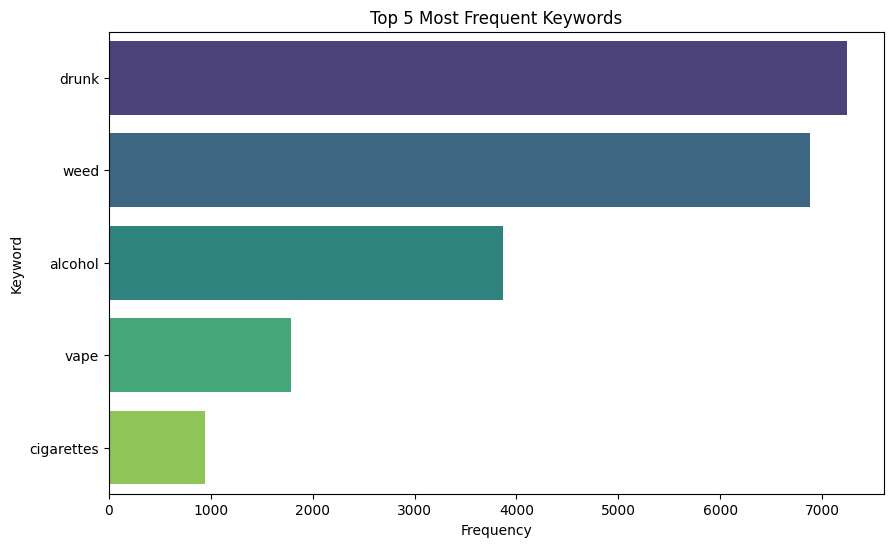

In [62]:
import seaborn as sns
# Get the top 5 most frequent keywords
top_keywords = keyword_frequencies.most_common(5)

# Create a DataFrame for visualization
top_keywords_df = pd.DataFrame(top_keywords, columns=['Keyword', 'Frequency'])

# Create a bar plot for the top 5 most frequent keywords
plt.figure(figsize=(10, 6))
sns.barplot(data=top_keywords_df, x='Frequency', y='Keyword', palette='viridis')
plt.title('Top 5 Most Frequent Keywords')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.show()